In [3]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [4]:
import sklearn 

In [83]:
train=pd.read_csv('C:\\Users\\Aleksandr\\.ipython\\ds3-spring-2018\\1. Intro to Data Science\\1.3 Sklearn\\spaceship\\train.csv')
test=pd.read_csv('C:\\Users\\Aleksandr\\.ipython\\ds3-spring-2018\\1. Intro to Data Science\\1.3 Sklearn\\spaceship\\test.csv')

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


рассмотрим в процентном соотношении столбцы train.csv сместо CryoSleep можно вписывать любые другие

In [99]:
train.Age.value_counts(normalize=True)

24.0    0.038055
18.0    0.037585
21.0    0.036528
19.0    0.034414
23.0    0.034296
          ...   
72.0    0.000470
78.0    0.000352
79.0    0.000352
76.0    0.000235
77.0    0.000235
Name: Age, Length: 80, dtype: float64

### Разделим на датафрейм train на X и Y значения
y_train - выжил наш пассажир или нет

x_train - свойства, которые влияют на то жив или нет

#### Для Y значения 
Возьмем из train столбец "Transported" и переведем в значения "1" и "0"

In [84]:
y_train=train['Transported']
y_train=y_train.replace({True: 1, False:0})
y_train.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

In [85]:
x_train=train.drop(['Transported'], axis=1)
# нет необходимости писать Inplace= true и так все сделает
# axis - удаляем столбец из фрейма; inplace - говорит, что мы подтверждаем изменения в фрейме
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


#### Предположение первое
Предположим, если о статусе VIP не известно, то он его и не имел. Логично предположить, что люди, которые
больше заплатили за билет,  будут в приоритете у компании перевозке. Тоже переведем его в "1" и "0" 

In [86]:
x_train['VIP']=x_train.VIP.replace({ True: 1, False:0})
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [87]:
x_train['VIP']=x_train['VIP'].fillna(0)

#### Предположение второе
посчитамем общее колво потраченных денег пассажиром

In [88]:
x_train['Summary']=x_train[['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
x_train=x_train.drop(columns=['RoomService', 'FoodCourt','ShoppingMall', 'Spa', 'VRDeck'])
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Summary
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,Maham Ofracculy,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,Juanna Vines,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,Altark Susent,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,Solam Susent,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,Willy Santantines,1091.0


 
Можно было предположить, что на каждые из 5 услуг неопределенные значения заменить на средние.
Но это могло привести к тому, что при сложении, общая трата пассажира может необъективно увеличиться.

Схуяли?

Это мы проверим, но позже.

Так как, сейчас особо нет дела до имен. Хотя можно выяснить по именам пол пассажира

In [89]:
x_train=x_train.drop(columns=['Name'])

#### Предположение третье 
Заполним столбец с возрастом. Неопределенный значения мы заменим средний возраст по столбцу
и попробуем сделать разбивку по возрастной категории на "дети", "взрослые", "старики"

Дети - до 18 лет

Взрослые- с 18 до 60 лет

Старики- Старше 60 лет



In [90]:
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Summary
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,1091.0


In [91]:
x_train['Age']=x_train['Age'].fillna(x_train['Age'].mean())

создадим пустые столбцы с неопределенными значениями

In [92]:
x_train['Child']=np.nan
x_train['Adults']=np.nan
x_train['Elder']=np.nan
x_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Summary,Child,Adults,Elder
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,NaN,NaN,NaN
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,736.0,NaN,NaN,NaN
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,10383.0,NaN,NaN,NaN
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,5176.0,NaN,NaN,NaN
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,1091.0,NaN,NaN,NaN


Напишем функцию, которая определит кто есть кто

### Для тебя КОНЧЕННЫЙ
в "age_class(x)"  x- это аргумент которым мы будем пользоваться в структуре функции  
"return" возвращает значение нашей функции после преобразований внутри

"apply" работает очень просто  
В нее мы передаем нашу функцию и привязываем к столбцу


In [79]:
def class_child (x):
    '''Функция выполняет распределение по возрасту пассажиров'''
    if x<18:
        return 1
    else:
        return 0

def class_adults (x):
    '''Функция выполняет распределение по возрасту пассажиров'''
    if 18<=x<=60:
        return 1
    else:
        return 0

def class_elder (x):
    '''Функция выполняет распределение по возрасту пассажиров'''
    if x>60:
        return 1
    else:
        return 0


In [93]:
# apply применяет написанную или существующую функцию к dataframe
x_train['Child']=x_train['Age'].apply(class_child)
x_train['Adults']=x_train['Age'].apply(class_adults)
x_train['Elder']=x_train['Age'].apply(class_elder)
#x_train=x_train.drop(columns=['Age'])
x_train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Summary,Child,Adults,Elder
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,0.0,736.0,0,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,1.0,10383.0,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,5176.0,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,0.0,1091.0,1,0,0


### Предположение 4  
Разберемся с криосном. Они не двигаються когда спят следовательно шансы спастись меньше

In [120]:
x_train['CryoSleep']=x_train.CryoSleep.replace({ True: 1, False:0})
x_train['CryoSleep']=x_train['CryoSleep'].fillna(0)
x_train.head(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Summary,Child,Adults,Elder
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0,1,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,736.0,0,1,0
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,10383.0,0,1,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,5176.0,0,1,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,1091.0,1,0,0
5,0005_01,Earth,0.0,F/0/P,PSO J318.5-22,44.0,0.0,774.0,0,1,0
6,0006_01,Earth,0.0,F/2/S,TRAPPIST-1e,26.0,0.0,1584.0,0,1,0
7,0006_02,Earth,1.0,G/0/S,TRAPPIST-1e,28.0,0.0,0.0,0,1,0
8,0007_01,Earth,0.0,F/3/S,TRAPPIST-1e,35.0,0.0,1018.0,0,1,0
9,0008_01,Europa,1.0,B/1/P,55 Cancri e,14.0,0.0,0.0,1,0,0


## Мне пришла гениальная идея разобрать столбец с информацией о номере пассажира

Вычленим первые и последние буквы из номеров кабин.  
Предположение такое, если мы разберемся с тем какая из частей сильней подверглась переносу, то можно эту информацию можно будет использовать в дальнейшем  
Начнем с первой буквы

In [214]:
import re

'''Создаем список для дальнейшей обработки нашего столбца Cabin'''

cabin_q=x_train['Cabin'].to_list()

'''Далее нам понадобиться пустой список, чтоб вносить туда значения '''
first_litter=[] 

for i in cabin_q:
    '''Патерн который ищет первые буквы номера кабины и добавляет его в пустой список'''
    litter_0=re.findall('^.',str(i))
    first_litter.extend(litter_0)  # extend имнно расширяет список а не прибавляет элемент

Создадим список уникальных значений а также посчитаем их колличество

In [225]:
uniq_1=[]

for i in first_litter:
    
    if i not in uniq_1:
        uniq_1.extend(i)
    else:
        continue

'''Сразу отсортируем список чтобы легче было работать'''
uniq_1=sorted(uniq_1, reverse=False)
print(uniq_1)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n']


Посчитаем колличество вхождений каждой из букв

In [226]:
quantity=[]
for i in uniq_1:
    c=0
    for j in first_litter:
        if i==j:
            c+=1
        else:
            continue
    quantity.append(c) # append ичпользкеться с числами а extend лучше со строками
print(quantity)

[256, 779, 747, 478, 876, 2794, 2559, 5, 199]


Построим график распредеения 

Text(0, 0.5, 'Quantity')

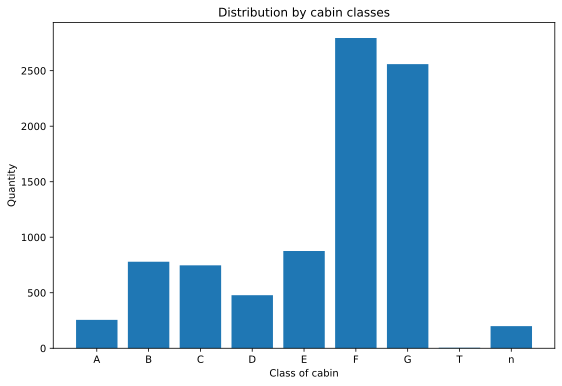

In [183]:
plt.bar(uniq_1,quantity)
plt.title('Distribution by cabin classes')
plt.xlabel('Class of cabin')
plt.ylabel('Quantity')


Видно , что больше всего сосредоточено на палубе 'F' и 'G' а на остальных меньше  
Также вычленим и прербразуем последнее значение ноиере кабины. Оно отвечает за то на какой стороне корабля нахдиться комната

In [227]:
import re

'''Далее нам понадобиться пустой список, чтоб вносить туда значения '''
last_litter=[] 

for i in cabin_q:
    '''Патерн который ищет последние буквы номера кабины и добавляет его в пустой список'''
    litter_1=re.findall('.$',str(i))
    last_litter.extend(litter_1)  # extend имнно расширяет список а не прибавляет элемент

Преобразуем наши данный в DataFrame для дальнейшего анализа

In [247]:
cabin_class=pd.DataFrame(data={
        'First litter': first_litter,
        'Last litter': last_litter,
        'Cryosleep': x_train['CryoSleep'],
    }
    )

Так как я сразу не обработал неопределенные данные, то сейчас это и сделаем  
Заменим неопределенные значения первой буквы на 'F', как на среднее. Неопределенные значения последней буквы, я удалил, как по мне 2 % не будут сильно влиять на выборку

In [248]:
cabin_class=pd.get_dummies(cabin_class,columns=['First litter', 'Last litter'])

cabin_class.loc[cabin_class['First litter_n']==1,'First litter_F']=1
cabin_class=cabin_class.drop(columns=['First litter_n'])

cabin_class=cabin_class.drop(columns=['Last litter_n'])

###Начнем анализ таблицы с кабинами
#### проведем нормализацию значений таблицы 'cabin_class'

In [249]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(cabin_class)

StandardScaler()

In [250]:
cabin_class_scaled = scaler.transform(cabin_class)
cabin_class_scaled = pd.DataFrame(cabin_class_scaled )
cabin_class_scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.732770,-0.174191,3.187347,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,1.032865,-0.986630
1,-0.732770,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,1.380016,-0.645897,-0.02399,-0.968181,1.013551
2,-0.732770,5.740821,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,-0.968181,1.013551
3,-0.732770,5.740821,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,-0.968181,1.013551
4,-0.732770,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,1.380016,-0.645897,-0.02399,-0.968181,1.013551
5,-0.732770,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,1.380016,-0.645897,-0.02399,1.032865,-0.986630
6,-0.732770,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,1.380016,-0.645897,-0.02399,-0.968181,1.013551
7,1.364685,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,-0.724629,1.548235,-0.02399,-0.968181,1.013551
8,-0.732770,-0.174191,-0.313741,-0.30661,-0.241218,-0.334759,1.380016,-0.645897,-0.02399,-0.968181,1.013551
9,1.364685,-0.174191,3.187347,-0.30661,-0.241218,-0.334759,-0.724629,-0.645897,-0.02399,1.032865,-0.986630


## ВАЖНО!!! надо собрать тест и тренировочный воедино и работать с ними

### Offtop: попробуем визуализировать всех пассажиров: есть ли там кластеры?
### PCA + clustering

PCA являеться одним из способов ускорения алгоритма машинного обучения или же для визуализации.  
PCA зависит от масштаба и перед тем как его использовать необходимо пронормировать значения. Исходная таблица имеет 10 столбцов, из которых 
8- информация о палубе, 2- информация о стороне борта. Поэтому 'n_components=2' так как категориальных, значений всего 2. 

In [257]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

ppl = pca.fit_transform(cabin_class_scaled) # применяем уменьшение размерности на 2

In [258]:
pca.explained_variance_ratio_.sum()

0.43997584297919556

Text(0.5, 1.0, 'Пассажиры корабля')

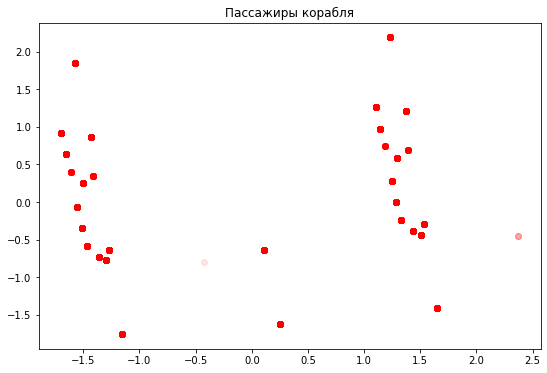

In [259]:
plt.plot(ppl[:,0], ppl[:,1], 'ro', alpha=0.1)
plt.title('Пассажиры корабля')

C:\Users\Aleksandr\AppData\Local\Temp\ipykernel_11628\497007315.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)


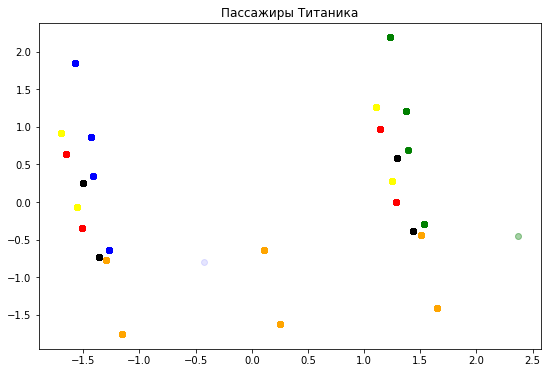

In [262]:
from sklearn.cluster import KMeans
n_clusters = 7

kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(cabin_class_scaled)

cluster_labels = kmeans.predict(cabin_class_scaled)

plt.title('Пассажиры Титаника')
for i,color in zip(range(n_clusters),{'blue','red','green','black','orange','yellow'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)